In [1]:
import os
import pandas as pd
import re

In [7]:


def extract_ecg_metadata(folder_path):
    """Traverse folder structure to extract ECG metadata from header files."""
    records = []
    
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.hea'):
                file_path = os.path.join(root, file)
                
                try:
                    with open(file_path, 'r') as f:
                        content = f.read().splitlines()
                        
                        # Extract record ID from first line
                        header_line = content[0].split()
                        record_id = re.sub(r'\D', '', header_line[0])  
                        # Extract diagnosis codes
                        diagnoses = []
                        for line in content:
                            if line.startswith('#Dx:'):
                                codes = line.split(': ')[-1].strip().split(',')
                                diagnoses.extend([c.strip() for c in codes])
                                
                        if record_id and diagnoses:
                            records.append({'ID': record_id, 'Diagnoses': diagnoses})
                            
                except Exception as e:
                    print(f"Error processing {file_path}: {str(e)}")
    
    return pd.DataFrame(records)

# Process data folder
df = extract_ecg_metadata('./data/ecg')

# Create one-hot encoding
one_hot_df = pd.get_dummies(
    df.explode('Diagnoses'),
    columns=['Diagnoses'],
    prefix='Dx'
).groupby('ID').max().reset_index()

# Save output
one_hot_df.to_csv('data/diagnoses.csv', index=False)
print("Processing completed. Results saved to data/diagnoses.csv")


KeyError: 'Diagnoses'

In [17]:
labels = pd.read_csv('data/diagnoses.csv')
labels['ID'] = labels['ID'].str.replace('\D', '', regex=True)
labels

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_26286/735990969.py:2: SyntaxWarning: invalid escape sequence '\D'
  labels['ID'] = labels['ID'].str.replace('\D', '', regex=True)


,ID,Dx_10370003,Dx_106068003,Dx_111288001,Dx_11157007,Dx_111975006,Dx_13640000,Dx_164865005,Dx_164873001,Dx_164889003,...,Dx_698252002,Dx_713422000,Dx_713426002,Dx_713427006,Dx_733534002,Dx_74390002,Dx_75532003,Dx_77867006,Dx_81898007,Dx_89792004
0,00001,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,00002,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,00004,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,00005,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,00006,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45147,45548,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45148,45549,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45149,45550,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45150,45551,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
labels.set_index('ID', inplace=True)
labels

,Dx_10370003,Dx_106068003,Dx_111288001,Dx_11157007,Dx_111975006,Dx_13640000,Dx_164865005,Dx_164873001,Dx_164889003,Dx_164890007,...,Dx_698252002,Dx_713422000,Dx_713426002,Dx_713427006,Dx_733534002,Dx_74390002,Dx_75532003,Dx_77867006,Dx_81898007,Dx_89792004
ID,,,,,,,,,,,,,,,,,,,,,
00001,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
00002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
00005,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
00006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45550,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Plot data

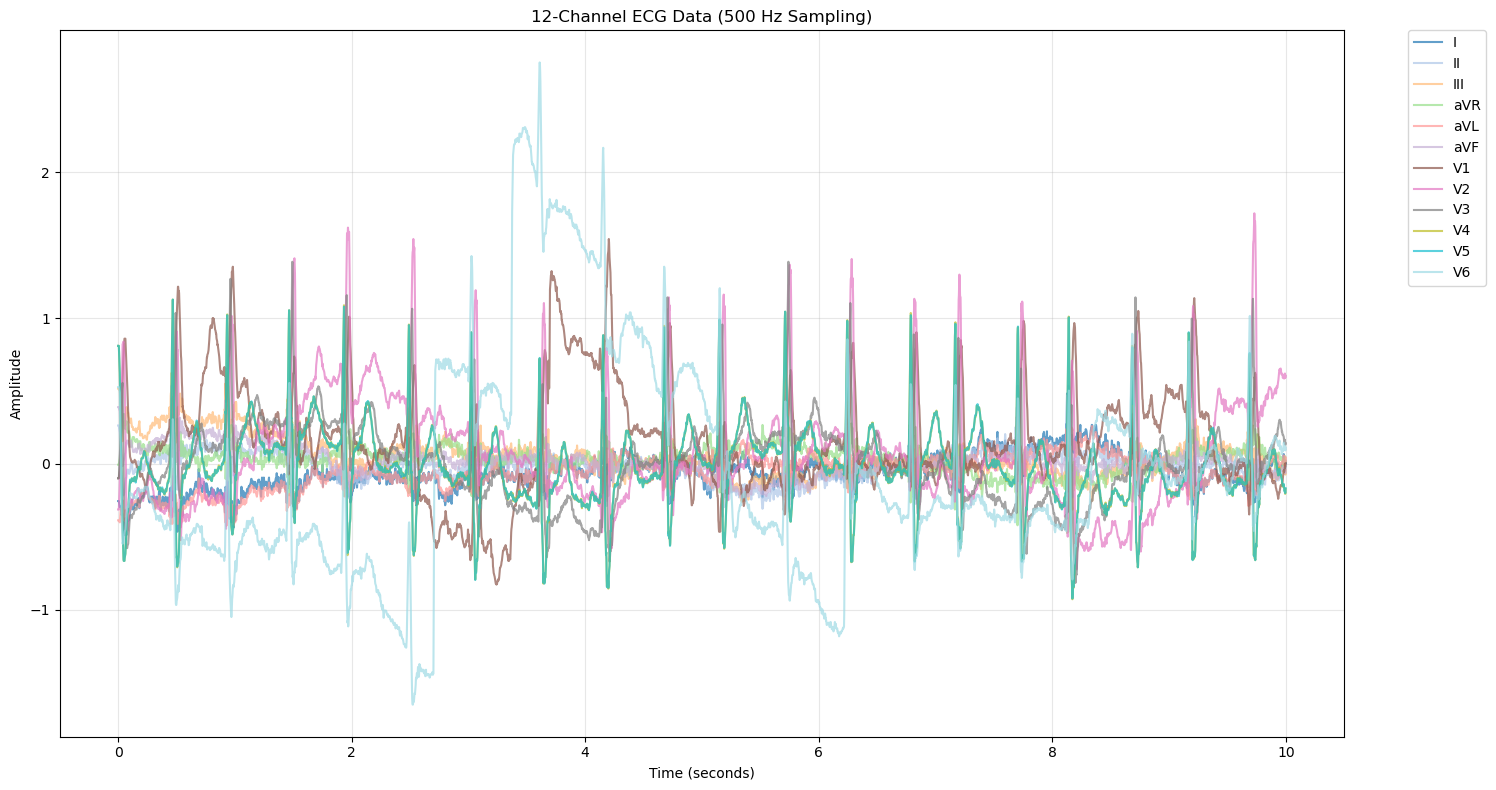

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file
df = pd.read_csv('/home/jiacheng/dl-proj/data/ecg/01/010/JS00001.csv')  # Replace with your filename

# Verify we have 12 series
if len(df.columns) != 12:
    print(f"Warning: Expected 12 columns, found {len(df.columns)}")

# Create time axis based on sampling rate
sampling_rate = 500  # Hz
df['time'] = df.index / sampling_rate  # Seconds

# Create plot
plt.figure(figsize=(15, 8))

# Use a colormap with 12 distinct colors
colors = plt.cm.tab20(np.linspace(0, 1, 12))

# Plot all 12 series
for i, column in enumerate(df.columns[1:]):  # Exclude time column
    plt.plot(df['time'], df[column], 
             color=colors[i],
             alpha=0.7,
             label=column)

# Format plot
plt.title(f"12-Channel ECG Data ({sampling_rate} Hz Sampling)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(alpha=0.3)

# Create legend outside plot
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc='upper left',
           borderaxespad=0.)

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# Configuration
FILE_PATH = "/home/jiacheng/dl-proj/data/ecg/01/010/JS00001.csv"  # REPLACE WITH ACTUAL PATH
SAMPLING_RATE = 500  # Hz

try:
    # Read CSV with time in first column
    df = pd.read_csv(FILE_PATH)
    
    # Verify structure
    if len(df.columns) != 13:  # 12 leads + time column
        raise ValueError(f"Expected 13 columns (time + 12 leads), got {len(df.columns)}")

    # Create interactive subplots
    fig = make_subplots(
        rows=12, 
        cols=1,
        shared_xaxes=True,
        subplot_titles=df.columns[1:],  # Lead names
        vertical_spacing=0.03
    )

    # Add traces for each lead
    for i, lead in enumerate(df.columns[1:]):  # Skip time column
        fig.add_trace(
            go.Scatter(
                x=df.iloc[:,0],  # Time values from first column
                y=df[lead],
                mode='lines',
                name=lead,
                hovertemplate="Time: %{x}s<br>Amplitude: %{y}<extra></extra>"
            ),
            row=i+1, 
            col=1
        )

    # Update layout
    fig.update_layout(
        height=1800,  # Adjust based on number of rows
        title_text=f"12-Lead ECG Display ({SAMPLING_RATE}Hz)",
        showlegend=False,
        hovermode="x unified"
    )

    # Format axes
    fig.update_xaxes(title_text="Time (seconds)", row=12, col=1)
    fig.for_each_yaxis(lambda axis: axis.update(title_text="mV"))

    # Add range slider
    fig.update_layout(
        xaxis=dict(
            rangeslider=dict(visible=True),
            type="linear"
        )
    )

    fig.show()

except FileNotFoundError:
    print(f"Error: File not found at {FILE_PATH}")
    print("1. Check file path exists")
    print("2. Verify file permissions")
    print("3. Ensure CSV format matches expectations")
except Exception as e:
    print(f"Error: {str(e)}")


In [9]:
for column in df.columns[1:]:  # Exclude the 'time' column
    mean = df[column].mean()
    std_dev = df[column].std()
    
    print(f"{column}: Mean = {mean:.2f}, Standard Deviation = {std_dev:.2f}")


I: Mean = -0.06, Standard Deviation = 0.12
II: Mean = -0.00, Standard Deviation = 0.11
III: Mean = 0.06, Standard Deviation = 0.14
aVR: Mean = 0.03, Standard Deviation = 0.09
aVL: Mean = -0.06, Standard Deviation = 0.12
aVF: Mean = 0.03, Standard Deviation = 0.11
V1: Mean = 0.17, Standard Deviation = 0.37
V2: Mean = 0.10, Standard Deviation = 0.38
V3: Mean = 0.02, Standard Deviation = 0.29
V4: Mean = -0.01, Standard Deviation = 0.27
V5: Mean = -0.01, Standard Deviation = 0.27
V6: Mean = -0.03, Standard Deviation = 0.76


In [10]:
# Z-score normalization
df_zscore = df.copy()
for column in df.columns[1:]:  # Exclude the 'time' column
    mean = df[column].mean()
    std_dev = df[column].std()
    df_zscore[column] = (df[column] - mean) / std_dev

print(df_zscore.head())

    time         I        II       III       aVR      aVL       aVF        V1  \
0  0.000 -1.603378  2.351407  3.264471 -0.395712 -2.75456  3.232695 -0.727461   
1  0.002 -1.603378  2.351407  3.264471 -0.395712 -2.75456  3.232695 -0.727461   
2  0.004 -1.603378  2.351407  3.264471 -0.395712 -2.75456  3.232695 -0.727461   
3  0.006 -1.603378  2.351407  3.264471 -0.395712 -2.75456  3.232695 -0.727461   
4  0.008 -1.686535  2.173351  3.200032 -0.234682 -2.75456  3.107244 -0.686852   

         V2        V3        V4        V5        V6  
0 -1.077665 -0.410864  3.050329  3.053742  0.741141  
1 -1.077665 -0.410864  3.050329  3.053742  0.741141  
2 -1.077665 -0.410864  3.050329  3.053742  0.741141  
3 -1.077665 -0.410864  3.050329  3.053742  0.741141  
4 -0.938460 -0.288636  2.849470  2.852713  0.727902  
